In [1]:
#%% libraries
import os
import sys
import glob
import io
import itertools
import textract
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### Wrappers for textract functions 

In [2]:
#%% reader functions
def pdf_to_txt(inpath, outpath):
    try:
        text = textract.process(inpath, method='pdftotext')
        base = os.path.abspath(inpath)
        wdir, fname = outpath, os.path.split(base)[1]
        writepath = wdir + '/' + fname.split('.')[0] + '.txt'

        with open(writepath, 'wb') as f:
            f.write(text)
    except:
        print(inpath, ' has incompatible characters. Run again')
        pass
    
    
def read_pdf(inpath):
    text = textract.process(inpath, method='pdftotext')
    return text

#### utility functions

In [3]:
import math

def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])

## Set working directory, Preliminaries

In [4]:
root = '/media/alal/LAL_DATA/Newspapers/The Himalayan Times'
os.chdir(root)

In [5]:
#%% directories
input = root 
output = root + '/raw_txts/'

if not os.path.exists(output):
    os.makedirs(output)

%pwd()

'/media/alal/LAL_DATA/Newspapers/The Himalayan Times'

*Construct list of files from all subdirectories, store file sizes in dictionary*

In [8]:
pdfs = []
sizes = {}

for root, dirs, files in os.walk(input):
    for file in files:
        if file.endswith(".pdf") and file[0] != '.':
            ff = os.path.join(root, file)
            pdfs.append(ff)
            size = os.path.getsize(ff) # in bytes
            sizes[file] = size

'461.36 KB'

'145.43 MB'

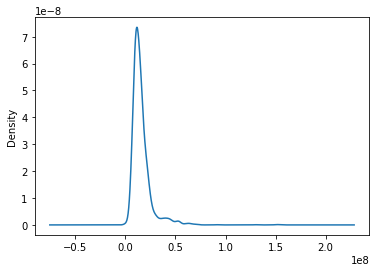

In [9]:
ser = pd.Series(sizes)
ser.plot.density()
convert_size(ser.min())
convert_size(ser.max())

## Bulk convert all pdfs in root - only run once
### Runtime ~= 30 mins

*bulk convert, experimenting with embarrasingly parallel execution*

In [10]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

In [11]:
%%time
results = Parallel(n_jobs=num_cores)(delayed(pdf_to_txt)(p,output) \
                                     for p in pdfs)

/media/alal/LAL_DATA/Newspapers/The Himalayan Times/2014/THT_2014_04_23.pdf  has incompatible characters. Run again
/media/alal/LAL_DATA/Newspapers/The Himalayan Times/2014/THT_2014_05_01.pdf  has incompatible characters. Run again
CPU times: user 1.98 s, sys: 404 ms, total: 2.39 s
Wall time: 35min 58s
